# Titanic: Machine Learning from Disaster

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# EDA

In [8]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

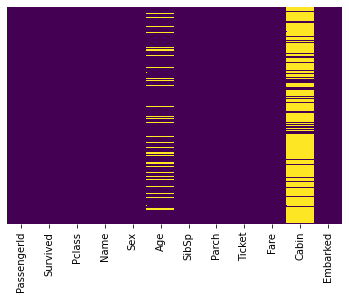

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')   # viridis

<AxesSubplot:xlabel='Survived', ylabel='count'>

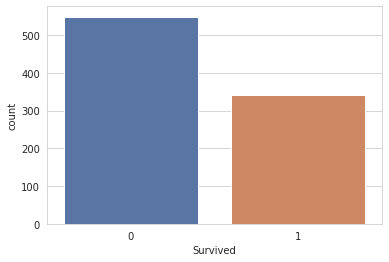

In [15]:
sns.set_style('whitegrid')
sns.countplot('Survived', data = df, palette = 'deep')

<AxesSubplot:xlabel='Survived', ylabel='count'>

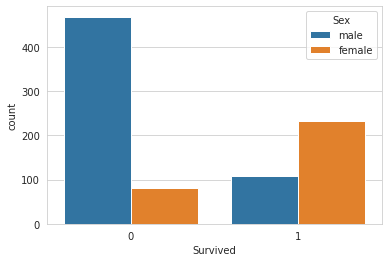

In [16]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

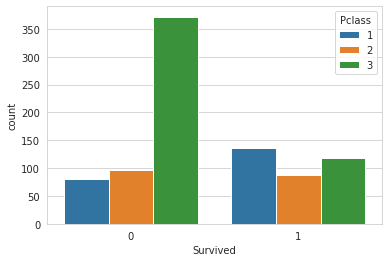

In [17]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

<AxesSubplot:xlabel='Age'>

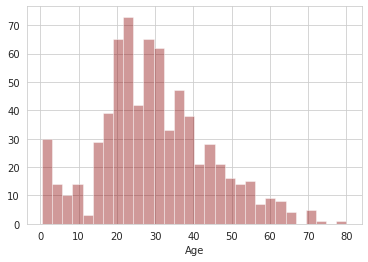

In [20]:
sns.distplot(df['Age'].dropna(), kde = False, color = 'darkred', bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

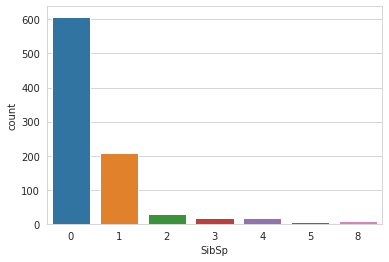

In [22]:
sns.countplot(x = 'SibSp', data = df)

<AxesSubplot:>

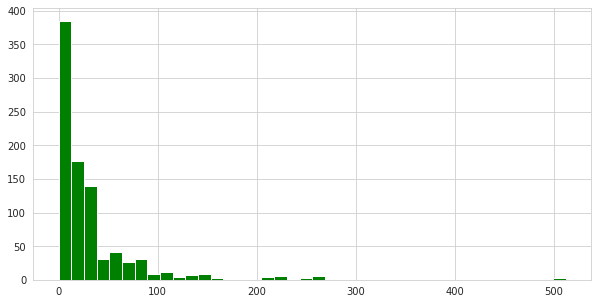

In [23]:
df['Fare'].hist(color = 'green', bins = 40, figsize = (10, 5))

In [24]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

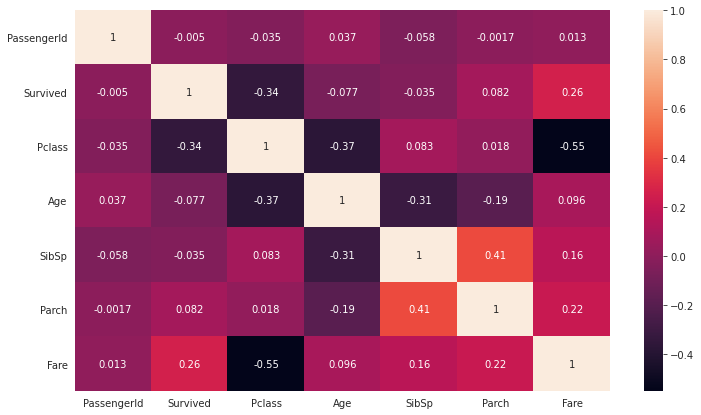

In [30]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True)

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

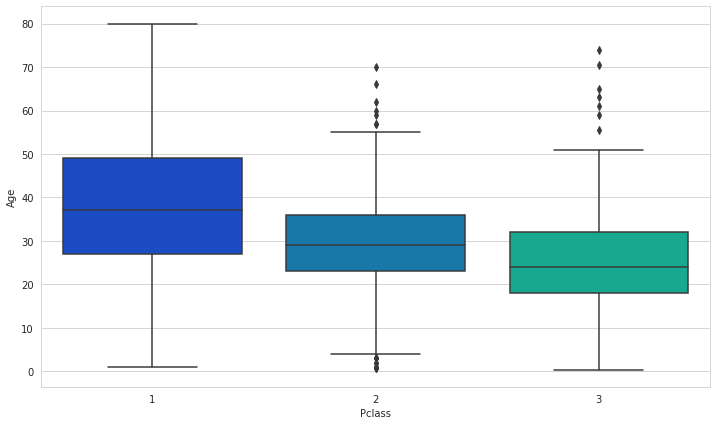

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y ='Age', data = df, palette = 'winter')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [34]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

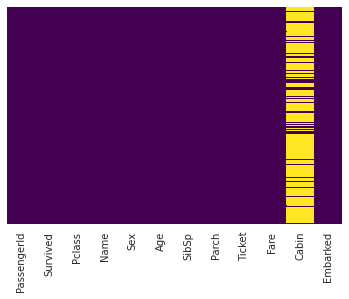

In [35]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.drop(['Cabin'], inplace = True, axis = 1)

In [41]:
df.dropna(inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [46]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [50]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace = True, axis = 1)

In [51]:
df = pd.concat([df, sex, embark], axis = 1)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703,0.043136,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,0.043136,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,-0.033694,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,0.022269,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


<AxesSubplot:>

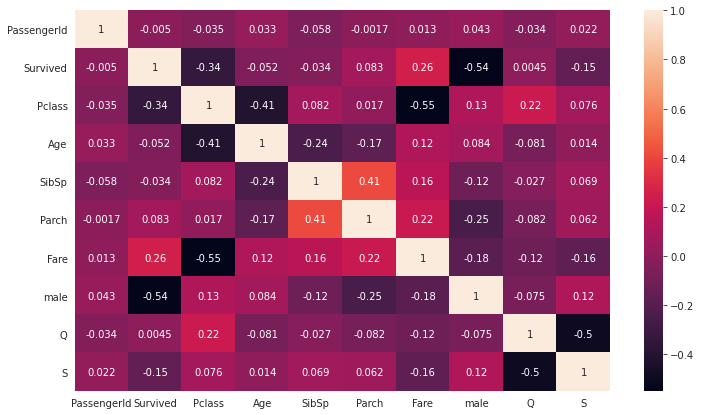

In [55]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True)

## Model

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),
                                                    df['Survived'], test_size=0.25,
                                                    random_state=42)

## Training

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
model.score(X_test, y_test)

0.7937219730941704

In [62]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7883399209486167


## Evaluation

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



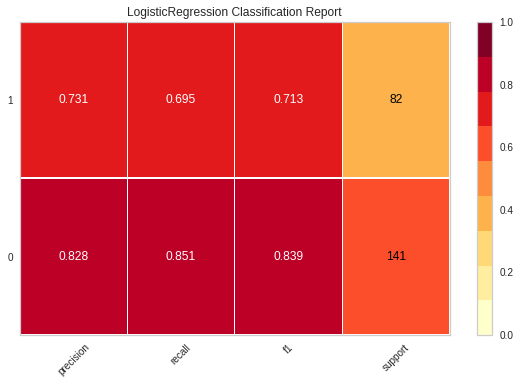

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [69]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [70]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [71]:
cnf_matrix

array([[120,  21],
       [ 25,  57]])

Text(0.5, 28.5, 'Predicted Label')

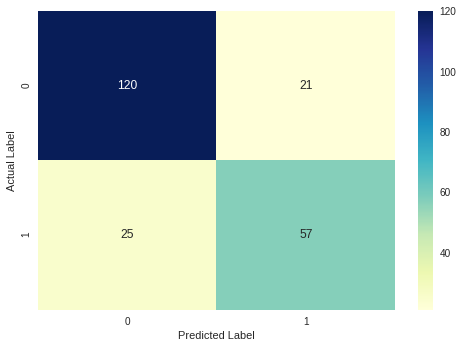

In [72]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')